In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.text import *

In [6]:
path = untar_data(URLs.IMDB_SAMPLE)

In [7]:
path

PosixPath('/home/jupyter/.fastai/data/imdb_sample')

In [8]:
path.ls()

[PosixPath('/home/jupyter/.fastai/data/imdb_sample/texts.csv')]

In [9]:
df = pd.read_csv(path/'texts.csv')

In [10]:
df.head()

,label,text,is_valid
0,negative,Un-bleeping-believable! Meg Ryan doesn't even ...,False
1,positive,This is a extremely well-made film. The acting...,False
2,negative,Every once in a long while a movie will come a...,False
3,positive,Name just says it all. I watched this movie wi...,False
4,negative,This movie succeeds at being one of the most u...,False


In [11]:
df.loc[0, 'text']

"Un-bleeping-believable! Meg Ryan doesn't even look her usual pert lovable self in this, which normally makes me forgive her shallow ticky acting schtick. Hard to believe she was the producer on this dog. Plus Kevin Kline: what kind of suicide trip has his career been on? Whoosh... Banzai!!! Finally this was directed by the guy who did Big Chill? Must be a replay of Jonestown - hollywood style. Wooofff!"

In [14]:
df['is_valid'].value_counts()

False    800
True     200
Name: is_valid, dtype: int64

In [16]:
data_lm = TextDataBunch.from_csv(path, csv_name='texts.csv')

In [17]:
data_lm.save()

In [20]:
data_lm.save?

In [21]:
data_lm.path

PosixPath('/home/jupyter/.fastai/data/imdb_sample')

In [22]:
data = TextDataBunch.load(path)

In [23]:
data.show_batch()

text,target
"xxbos xxmaj raising xxmaj victor xxmaj vargas : a xxmaj review \n\n xxmaj you know , xxmaj raising xxmaj victor xxmaj vargas is like sticking your hands into a big , xxunk bowl of xxunk . xxmaj it 's warm and xxunk , but you 're not sure if it feels right . xxmaj try as i might , no matter how warm and xxunk xxmaj raising xxmaj victor xxmaj",negative
"xxbos xxup the xxup shop xxup around xxup the xxup corner is one of the xxunk and most feel - good romantic comedies ever made . xxmaj there 's just no getting around that , and it 's hard to actually put one 's feeling for this film into words . xxmaj it 's not one of those films that tries too hard , nor does it come up with",positive
"xxbos xxmaj now that xxmaj che(2008 ) has finished its relatively short xxmaj australian cinema run ( extremely limited xxunk screen in xxmaj xxunk , after xxunk ) , i can xxunk join both xxunk of "" xxmaj at xxmaj the xxmaj movies "" in taking xxmaj steven xxmaj soderbergh to task . \n\n xxmaj it 's usually satisfying to watch a film director change his style / subject ,",negative
"xxbos xxmaj this film sat on my xxmaj xxunk for weeks before i watched it . i xxunk a self - indulgent xxunk flick about relationships gone bad . i was wrong ; this was an xxunk xxunk into the screwed - up xxunk of xxmaj new xxmaj xxunk . \n\n xxmaj the format is the same as xxmaj max xxmaj xxunk ' "" xxmaj la xxmaj xxunk , """,positive
"xxbos xxmaj many neglect that this is n't just a classic due to the fact that it 's the first xxup 3d game , or even the first xxunk - up . xxmaj it 's also one of the first xxunk games , one of the xxunk definitely the first ) truly claustrophobic games , and just a pretty well - xxunk gaming experience in general . xxmaj with graphics",positive


In [24]:
data = TextClasDataBunch.load(path)

In [25]:
data.show_batch()

text,target
"xxbos xxmaj raising xxmaj victor xxmaj vargas : a xxmaj review \n\n xxmaj you know , xxmaj raising xxmaj victor xxmaj vargas is like sticking your hands into a big , xxunk bowl of xxunk . xxmaj it 's warm and xxunk , but you 're not sure if it feels right . xxmaj try as i might , no matter how warm and xxunk xxmaj raising xxmaj victor xxmaj",negative
"xxbos xxup the xxup shop xxup around xxup the xxup corner is one of the xxunk and most feel - good romantic comedies ever made . xxmaj there 's just no getting around that , and it 's hard to actually put one 's feeling for this film into words . xxmaj it 's not one of those films that tries too hard , nor does it come up with",positive
"xxbos xxmaj now that xxmaj che(2008 ) has finished its relatively short xxmaj australian cinema run ( extremely limited xxunk screen in xxmaj xxunk , after xxunk ) , i can xxunk join both xxunk of "" xxmaj at xxmaj the xxmaj movies "" in taking xxmaj steven xxmaj soderbergh to task . \n\n xxmaj it 's usually satisfying to watch a film director change his style / subject ,",negative
"xxbos xxmaj this film sat on my xxmaj xxunk for weeks before i watched it . i xxunk a self - indulgent xxunk flick about relationships gone bad . i was wrong ; this was an xxunk xxunk into the screwed - up xxunk of xxmaj new xxmaj xxunk . \n\n xxmaj the format is the same as xxmaj max xxmaj xxunk ' "" xxmaj la xxmaj xxunk , """,positive
"xxbos xxmaj many neglect that this is n't just a classic due to the fact that it 's the first xxup 3d game , or even the first xxunk - up . xxmaj it 's also one of the first xxunk games , one of the xxunk definitely the first ) truly claustrophobic games , and just a pretty well - xxunk gaming experience in general . xxmaj with graphics",positive


In [27]:
data.vocab.itos[:10]

['xxunk',
 'xxpad',
 'xxbos',
 'xxfld',
 'xxmaj',
 'xxup',
 'xxrep',
 'xxwrep',
 'the',
 ',']

In [37]:
data.train_ds[0][0].data

array([   2,    4, 3805,    4, ...,   13, 3808, 3240,   10])

In [42]:
path

PosixPath('/home/jupyter/.fastai/data/imdb_sample')

In [43]:
df.head()

,label,text,is_valid
0,negative,Un-bleeping-believable! Meg Ryan doesn't even ...,False
1,positive,This is a extremely well-made film. The acting...,False
2,negative,Every once in a long while a movie will come a...,False
3,positive,Name just says it all. I watched this movie wi...,False
4,negative,This movie succeeds at being one of the most u...,False


In [58]:
data = (TextList.from_csv(path, 'texts.csv', cols='text')
        .split_from_df(col='is_valid')
        .label_from_df(cols='label')
       .databunch())

> TextList object like this `TextList.from_csv(path, 'texts.csv', cols='text')` cannot be printed out here in Jupyter notebook. Error is raised.  It can only be printed without error when it gets to a labeled list: `(TextList.from_csv(path, 'texts.csv', cols='text')
        .split_from_df(col='is_valid')
        .label_from_df(cols='label'))`

In [59]:
data

TextClasDataBunch;

Train: LabelList
y: CategoryList (800 items)
[Category negative, Category positive, Category negative, Category positive, Category negative]...
Path: /home/jupyter/.fastai/data/imdb_sample
x: TextList (800 items)
[Text xxbos xxmaj un - xxunk - believable ! xxmaj meg xxmaj ryan does n't even look her usual xxunk lovable self in this , which normally makes me forgive her shallow xxunk acting xxunk . xxmaj hard to believe she was the producer on this dog . xxmaj plus xxmaj kevin xxmaj kline : what kind of suicide trip has his career been on ? xxmaj xxunk ... xxmaj xxunk ! ! ! xxmaj finally this was directed by the guy who did xxmaj big xxmaj xxunk ? xxmaj must be a replay of xxmaj jonestown - hollywood style . xxmaj xxunk !, Text xxbos xxmaj this is a extremely well - made film . xxmaj the acting , script and camera - work are all first - rate . xxmaj the music is good , too , though it is mostly early in the film , when things are still relatively xxunk . xxmaj there 

In [3]:
bs = 12

In [4]:
path = untar_data(URLs.IMDB)

In [5]:
path

PosixPath('/home/jupyter/.fastai/data/imdb')

In [6]:
(path).ls()

[PosixPath('/home/jupyter/.fastai/data/imdb/unsup'),
 PosixPath('/home/jupyter/.fastai/data/imdb/tmp_clas'),
 PosixPath('/home/jupyter/.fastai/data/imdb/test'),
 PosixPath('/home/jupyter/.fastai/data/imdb/train'),
 PosixPath('/home/jupyter/.fastai/data/imdb/README'),
 PosixPath('/home/jupyter/.fastai/data/imdb/models'),
 PosixPath('/home/jupyter/.fastai/data/imdb/tmp_lm'),
 PosixPath('/home/jupyter/.fastai/data/imdb/imdb.vocab')]

In [7]:
data_lm = (TextList.from_folder(path)
          .filter_by_folder(include=['train', 'test', 'unsup'])
          .random_split_by_pct(.1)
          .label_for_lm()
          .databunch(bs=bs))

KeyboardInterrupt: 

In [67]:
data_lm.save('tmp_lm')

In [8]:
data_lm = TextLMDataBunch.load(path, 'tmp_lm', bs=bs)

In [9]:
data_lm.show_batch()

idx,text
0,"* out of xxrep 4 * ) constitutes his plea for tolerance toward xxmaj israeli and xxmaj palestinian immigrants in xxmaj america . xxmaj these unfortunate people are often punished in xxmaj america for the crimes of their counterparts in the war - ravaged xxmaj middle xxmaj east . xxmaj although "" xxmaj zohan "" advocates a lofty cause , xxmaj sandler does n't let his political agenda overshadow his"
1,"taping the attack on his house and speaking at the same time and among a frenzy of "" reporter - talk "" he says , \n\n "" what are we supposed to feel ? "" \n\n the key to the movie is , you are never allowed to know what you are supposed to feel . these days , whether you know this or not , we are frequently """
2,"the middle of town and then desert it , saying "" it 's been here this long , it ai n't goin' anywhere . "" xxmaj what ? a woman sits and xxunk simply because her friends have walked into the forest and have been gone for awhile . xxmaj what ? xxmaj oh , and my favorite scene , where a guy gets shot and falls over onto some"
3,"day gangster land ? xxmaj this movie , in my humble opinion , would most likely gain acceptance with an older crowd , such as early baby boomers , like myself , in that we remember the great black and white films where special effects were absent and acting was paramount . a bit wacky , but still a nice little throwback . xxmaj relax and have fun with this"
4,"by with grace , ending with a fantastic battle inside a xxmaj nazi stronghold , and the climatic battle between xxmaj cap and the skull at the end is also unbelievable . xxmaj and do n't get me started on the "" xxmaj pull over . i feel sick . "" parts of it . \n\n xxup overall : xxmaj one of the best comic films out there , even"


In [10]:
learn = language_model_learner(data=data_lm, arch=AWD_LSTM, drop_mult=.3)

In [18]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


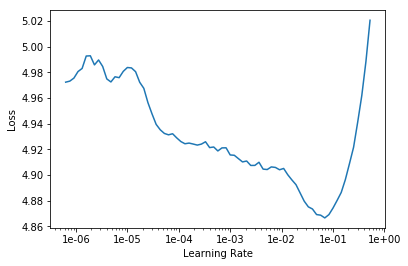

In [19]:
learn.recorder.plot(skip_end=15)

In [20]:
learn.fit_one_cycle(cyc_len=1, max_lr=2e-2, moms=(.8, .7))

epoch,train_loss,valid_loss,accuracy,time
1,4.304401,4.134574,0.286903,53:21


In [21]:
learn.save('fit_head')

In [11]:
learn.load('fit_head');

In [12]:
learn.unfreeze()

In [13]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


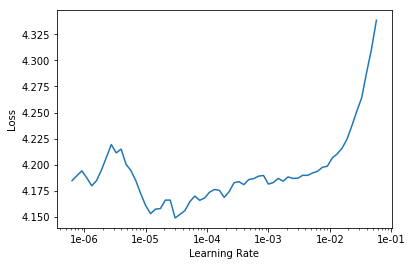

In [16]:
learn.recorder.plot(skip_end=25)

In [17]:
learn.fit_one_cycle(cyc_len=10, max_lr=slice(8e-6), moms=(.8, .7))

epoch,train_loss,valid_loss,accuracy,time


KeyboardInterrupt: 

In [ ]:
learn.save('fine_tuned');

In [ ]:
learn.load('fine_tuned');

In [ ]:
TEXT = 'I liked this movie because'
N_WORDS = 40
N_SENTENCES = 2

In [ ]:
print('\n'.join(learn.predict(TEXT, N_WORDS, temperature=.7) for _ in range(N_SENTENCES)))

In [ ]:
learn.save_encoder('fine_tuned_enc')

In [ ]:
path = untar_data(URLs.IMDB)

In [ ]:
data_clas = (TextList.from_folder(path, vocab=data_lm.vocab)
            .split_by_folder(valid='test')
            .label_from_folder=['neg', 'pos']
            .databunch(bs=bs))

data_clas.save('data_clas.pkl')

In [ ]:
data_clas = load_data(path, 'data_clas.pkl', bs=bs)

In [ ]:
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=.5)
learn.load_encoder('fine_tuned_enc')

In [ ]:
learn.lr_find()

In [ ]:
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(cyc_len=1, max_lr=slice(2e-2), moms=(.8,.7))

In [ ]:
learn.save('first')

In [ ]:
learn.load('first')

In [ ]:
learn.freeze_to(-2)

In [ ]:
learn.fit_one_cycle(cyc_len=1, max_lr=slice(1e-2/(2.6**4), 1e-2), moms=(.8,.7))

In [ ]:
learn.save('second')

In [ ]:
learn.load('second')

In [ ]:
learn.freeze_to(-3)
learn.fit_one_cycle(cyc_len=1, max_lr=slice(5e-3/(2.6**4), 5e-3), moms=(.8,.7))

In [ ]:
learn.save('third')

In [ ]:
learn.load('third')

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(cyc_len=2, max_lr=slice(1e-3/(2.6**4), 1e-3), mom=(.8,.7))

In [ ]:
learn.predict('I really loved that movie, it was awesome!')